<h1><font color='black'>Joining data in Pandas</font></h1>

<p align="center" width="100%">
    <img width="100%" src="">
</p>

<hr>

<h2><font color='black'>How to join</font></h2>

<h3><font color='grey'>Pandas basics</font></h3>

In [77]:
# pandas
import pandas as pd

# libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# style
!pip install ipynb | grep -v 'already satisfied'
from ipynb.fs.full.Style_Sheet import *
plt.style.use(style_use)
plt.rcParams.update(style_params)

<br>

<h3><font color='grey'>Sessions data</font></h3>

<p></p>

<br>

In [76]:
# function
def csv_to_df(file_path):
    df = pd.read_csv(file_path)
    return df

# sessions
sessions = csv_to_df('data_sessions.csv')
print('Sample: ' + str(len(sessions)))
sessions.head()

Sample: 10000


,session_id,date_event,date_timestamp_event
0,ad22f37f-3090,05/05/2022,05/05/2022 21:19:54
1,dec34cea-8172,05/05/2022,05/05/2022 11:12:54
2,532c96bd-5036,05/05/2022,05/05/2022 12:51:22
3,5c503911-6193,05/05/2022,05/05/2022 15:28:44
4,a36043e6-3259,05/05/2022,05/05/2022 11:28:08


<br>

<h3><font color='grey'>Related tables</font></h3>

<p></p>

<br>

In [2]:
# journey
journey = csv_to_df('data_journey.csv')
journey.head()

,session_id,account_login,basket_page,checkout_page,order_placed
0,ad22f37f-3090,0,0,0,0
1,dec34cea-8172,0,0,0,0
2,532c96bd-5036,1,0,0,0
3,5c503911-6193,0,0,0,0
4,a36043e6-3259,1,0,0,0


<hr>

<br>

<h2><font color='black'>Inner merge</font></h2>

<h3><font color='grey'>Ordering sessions only</font></h3>

<p></p>

<br>

In [3]:
# subset journey for orders only
cols = ['session_id', 'order_placed']
crit = journey['order_placed']==1
orders = pd.DataFrame(journey[cols][crit])
print('Volume of ordering sessions: ' + str(len(orders)))

# inner merge
orders_only = sessions.merge(orders, on='session_id', how='inner')
orders_only.head()

Volume of ordering sessions: 553


,session_id,date_event,date_timestamp_event,order_placed
0,65b27871-6553,05/05/2022,05/05/2022 11:09:49,1
1,47efb53a-8254,05/05/2022,05/05/2022 09:24:34,1
2,97318337-5506,05/05/2022,05/05/2022 20:26:48,1
3,4600a228-1818,05/05/2022,05/05/2022 00:58:56,1
4,67bdf976-8388,05/05/2022,05/05/2022 07:20:26,1


<hr>

<br>

<h2><font color='black'>Left merge</font></h2>

<h3><font color='grey'>Orders & no orders</font></h3>

<p></p>

<br>

In [22]:
# left merge
orders_all = sessions.merge(orders, on='session_id', how='left')

# replace nulls with 0
orders_all['order_placed'] = orders_all['order_placed'].fillna(0)

# show
print(orders_all.shape)
orders_all.head()

(10000, 4)


,session_id,date_event,date_timestamp_event,order_placed
0,ad22f37f-3090,05/05/2022,05/05/2022 21:19:54,0.0
1,dec34cea-8172,05/05/2022,05/05/2022 11:12:54,0.0
2,532c96bd-5036,05/05/2022,05/05/2022 12:51:22,0.0
3,5c503911-6193,05/05/2022,05/05/2022 15:28:44,0.0
4,a36043e6-3259,05/05/2022,05/05/2022 11:28:08,0.0


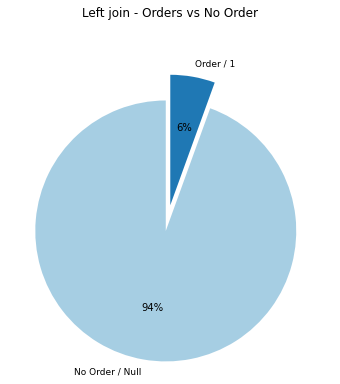

In [20]:
# pivot
orders_pivot = orders_all.groupby('order_placed').agg({'order_placed': 'count'})

# pie
def viz_pie(ax, y, labels, explode):
    ax.pie(y, labels=labels, explode=explode, startangle=90, colors=palette_paired, autopct='%.0f%%')
    ax.set_title(title)

# variables
y = orders_pivot['order_placed']
labels = ['No Order / Null', 'Order / 1']
explode = [0.2, 0]
title = 'Left join - Orders vs No Order'

# viz
fig, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
viz_pie(ax_1, y, labels, explode)
plt.show()

<hr>

<br>

<h2><font color='black'>Right merge</font></h2>

<h3><font color='grey'>Limiting to orderers only</font></h3>

<p></p>

<br>

In [31]:
# device
device = csv_to_df('data_device.csv')
device.head()

,session_id,device_type
0,ad22f37f-3090,Desktop
1,dec34cea-8172,App iOS
2,532c96bd-5036,App iOS
3,5c503911-6193,App iOS
4,a36043e6-3259,App Android


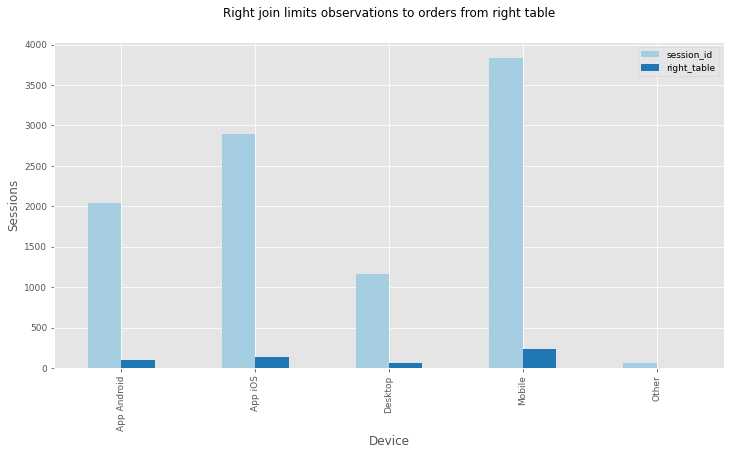

In [49]:
# pivot device
device_pivot = device.groupby('device_type').agg({'session_id':'count'})

# right merge with orders
device_orders = device.merge(orders, on='session_id', how='right')
device_orders_pivot = device_orders.groupby('device_type').agg({'session_id':'count'})

# return right join to other df
device_pivot['right_table'] = device_orders_pivot['session_id']

# bar graph
def viz_bar(ax, data, stacked, title, y_label, x_label):
    data.plot(ax=ax, kind='bar', stacked=stacked, color=palette_paired, alpha=1)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)

# viz
fig, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
viz_bar(ax_1, device_pivot, False, 'Right join limits observations to orders from right table', 'Sessions', 'Device')
plt.show()

<hr>

<br>

<h2><font color='black'>Outer merge</font></h2>

<h3><font color='grey'>Desktop users & all orderers</font></h3>

<p></p>

<br>

In [74]:
# desktop users only
crit = device['device_type']=='Desktop'
desktop = device[crit]

# outer merge with orders
desktop_orders = desktop.merge(orders, on='session_id', how='outer').sort_values('session_id')

# fill na
desktop_orders['device_type'] = desktop_orders['device_type'].fillna('Unknown')
desktop_orders['order_placed'] = desktop_orders['order_placed'].fillna(0)

# show
desktop_orders.head()

,session_id,device_type,order_placed
15,0005054a-1608,Desktop,0.0
204,002c4caa-1917,Desktop,0.0
701,00302377-8608,Desktop,0.0
1408,0047ab48-5829,Unknown,1.0
819,0049fd3a-6053,Desktop,0.0


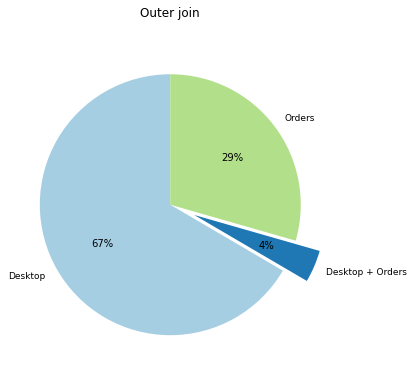

In [75]:
# pivot
groupby = ['device_type', 'order_placed']
desktop_orders_pivot = desktop_orders.groupby(groupby).agg({'session_id':'count'})

# pie variables
y = desktop_orders_pivot['session_id']
labels = ['Desktop', 'Desktop + Orders', 'Orders']
explode = [0, 0.2, 0]
title = 'Outer join'

# show
fig, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
viz_pie(ax_1, y, labels, explode)
plt.show()